# KNN 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [86]:
from sklearn.datasets import load_wine

In [87]:
dataset = load_wine(return_X_y=False)

In [88]:
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [89]:
X =pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [92]:
y=pd.Categorical.from_codes(dataset.target,dataset.target_names)

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [95]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [96]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [97]:
y.shape

(178,)

In [98]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [99]:
# no null values

In [100]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


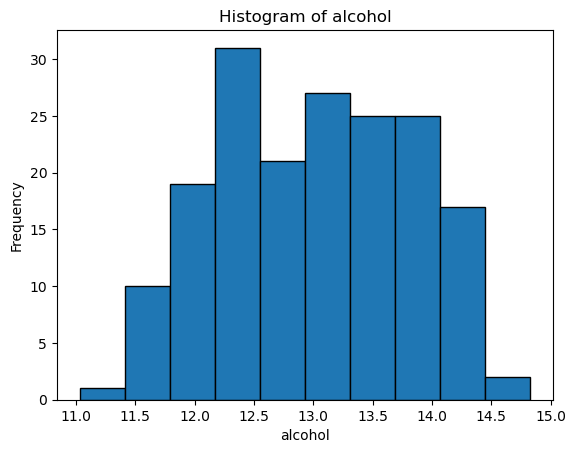

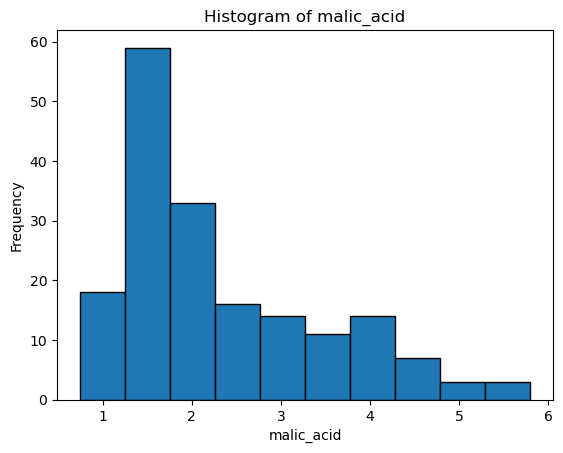

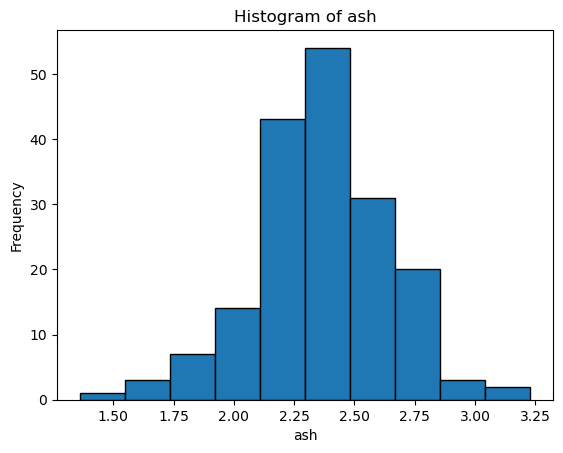

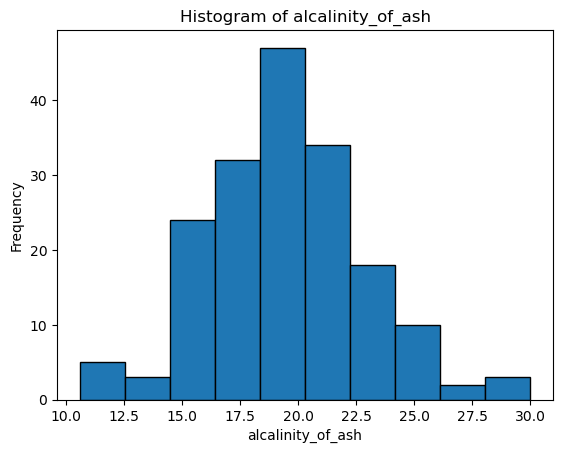

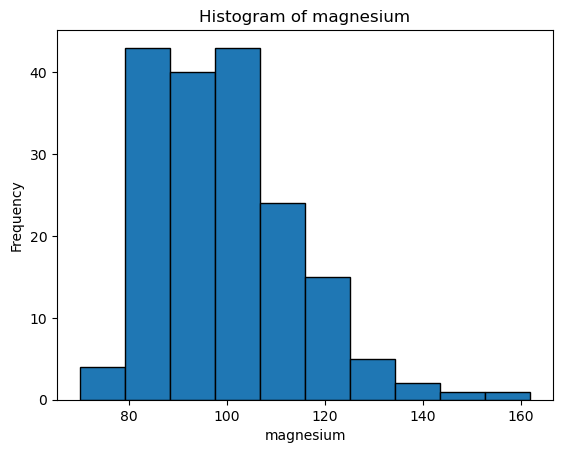

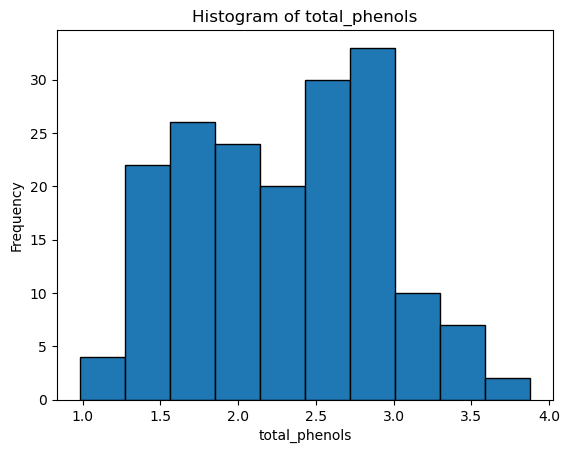

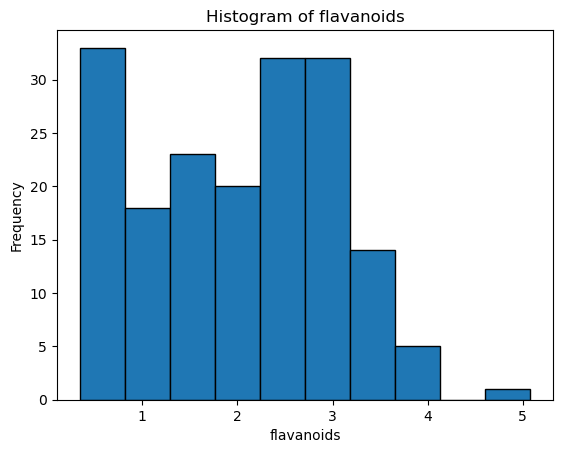

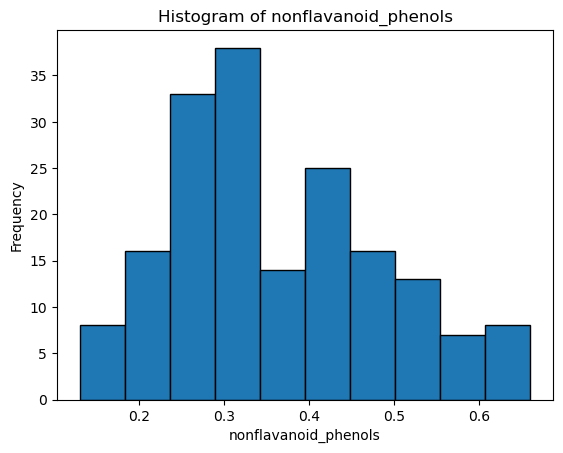

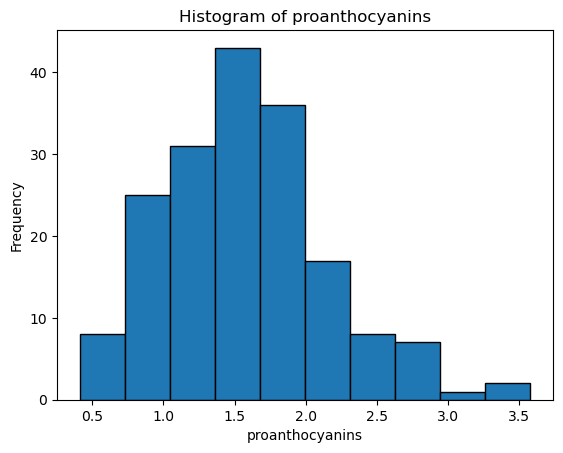

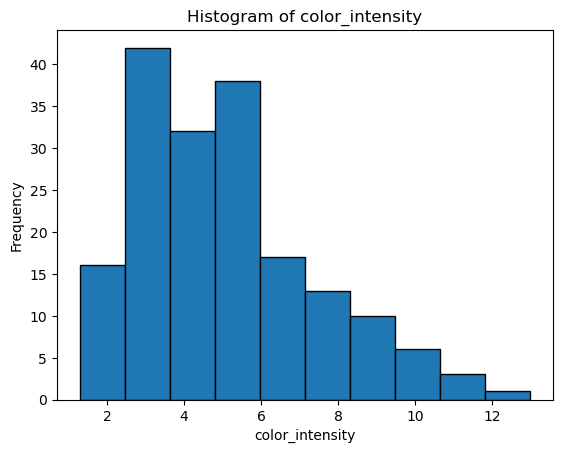

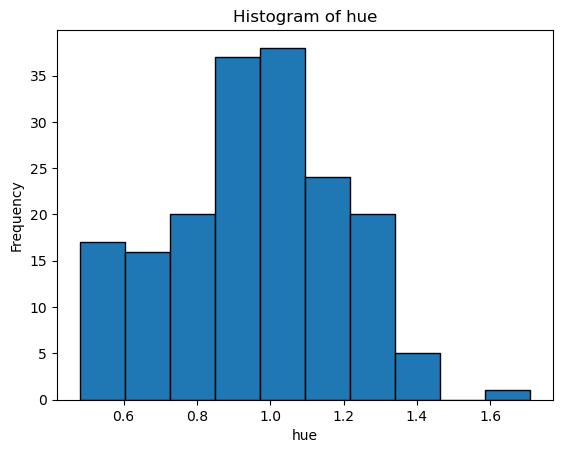

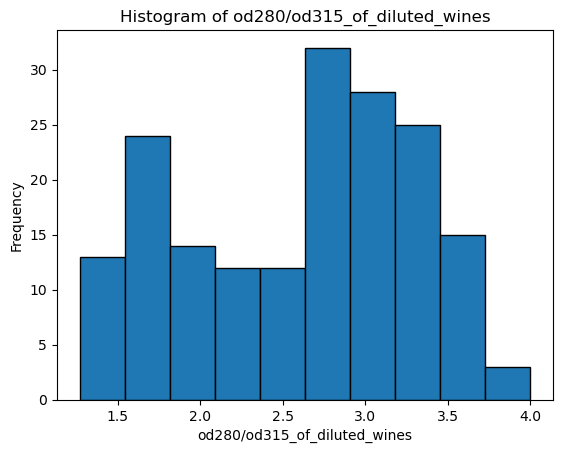

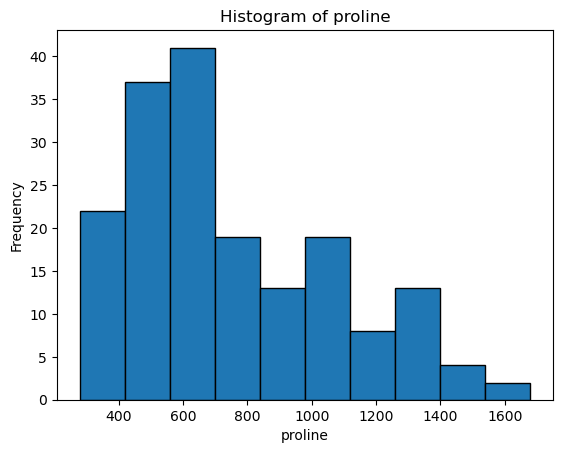

In [101]:
for feature in dataset.feature_names:
    plt.figure()
#     fig,axs=plt.subplots(2,7,figsize=(20,9))
    plt.hist(X[feature], bins=10, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + feature)

<AxesSubplot:>

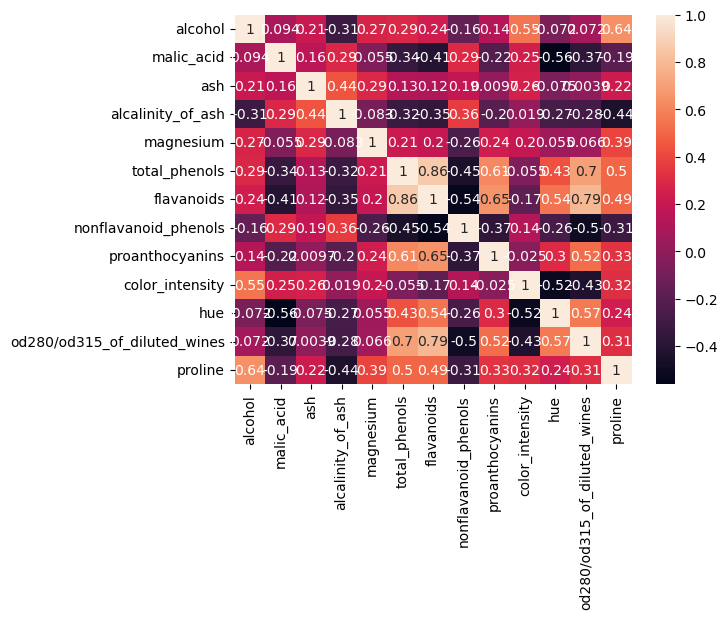

In [102]:
corr_mat = X.corr()
sns.heatmap(corr_mat,annot=True)

In [103]:
print("Number of instances:", X.shape[0])
print("Number of features:", X.shape[1])

Number of instances: 178
Number of features: 13


In [104]:
from sklearn.neighbors import KNeighborsClassifier


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [106]:
scaler = StandardScaler()

In [107]:
X_scaled = scaler.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [109]:
err_rate =[]
for i in range(2,16): # k=2,3,4,..10
    model=KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    err_rate.append(np.mean(y_test!=y_pred))

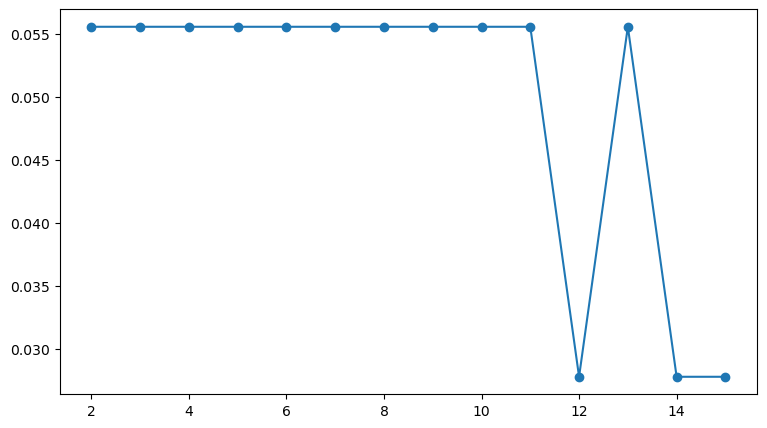

In [110]:
plt.figure(figsize=(9,5))
plt.plot(range(2,16),err_rate,marker='o')

In [111]:
# X_min,x_max=X_train[:,0].min()-0.5,X_train[:,0].max()+0.5   # setting the limit 
# y_min,y_max=X_train[:,0].min()-0.5,X_train[:,0].max()+0.5

# x1,y1=np.meshgrid(np.arange(0,1.5,0.01),np.arange(0,1.5,0.02))

# Z=model.predict(np.c_[x1.ravel(),y1.ravel()]) 

# Z=Z.reshape(x1.shape)


In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# K 12

In [113]:
k=12
k12model=KNeighborsClassifier(k).fit(X_train,y_train)


In [114]:
y_pred1 = k12model.predict(X_test)

In [133]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[14,  0,  0],
       [ 1, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [117]:
print(" accuracy on train :" , k12model.score(X_train,y_train))

 accuracy on train : 0.9788732394366197


In [118]:
print("accuracy on test: ", k12model.score(X_test,y_test))

accuracy on test:  0.9722222222222222


Text(120.72222222222221, 0.5, 'predicted')

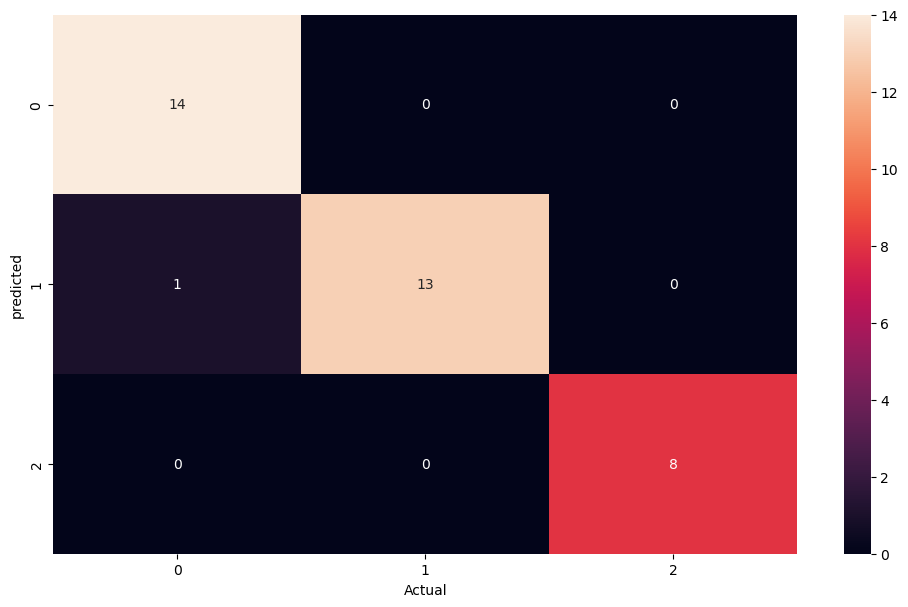

In [134]:
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")

In [128]:
wrong_pred_indices = np.where(y_pred1 != y_test)
# wrong prdictions

In [129]:

# Get the corresponding neighbors for wrong predictions
neighbors = k12model.kneighbors(X_test[wrong_pred_indices], n_neighbors=12, return_distance=False)

In [130]:
neighbors
#distances

array([[121,  33,  52,   6,  21,  85,  50,  54,  57,   4,  82,  25]],
      dtype=int64)

In [1]:
# The above shows the distances of the neighbors.